In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from IPython.display import display

# comments
- It just so happened that the min/max data wasn't available during 2020 for some reason for this particular station, so we'll have to make due with just the averages
- The data for this area 

In [ ]:
dt_start,dt_end = datetime.datetime(2020,1,1,0,0,0), datetime.datetime(2020,12,31,23,59,59)

URL_drainage_data = 'C:/Users/sverrirhd/Google Drive/Skóli/DTU/Thesis/Data/Drainage data/'
URL_drainage_2020_file = URL_drainage_data + 'F-RVK-ING-RS111.csv'
URL_drainage_height_2020_file = URL_drainage_data + 'F-RVK-ING-HS111.csv'

df_dr = pd.read_csv(URL_drainage_2020_file)
df_dr.CTime = pd.to_datetime(df_dr.CTime)
df_dr = df_dr[(df_dr.Flag == 0) & (df_dr.CType == 4)]
y_flow = pd.pivot_table(df_dr,values='Val',index='CTime',columns='Name')
y_flow = y_flow.loc[:,'F-RVK-ING-RS111'].resample('1h').mean().interpolate(method = 'linear')

df_he = pd.read_csv(URL_drainage_height_2020_file)
df_he.CTime = pd.to_datetime(df_he.CTime)
df_he_mean = df_he[(df_he.Flag == 0) & (df_he.CType == 4)]
df_he_max = df_he[(df_he.Flag == 0) & (df_he.CType == 9)]
df_he_min = df_he[(df_he.Flag == 0) & (df_he.CType == 7)]

y_height_mean = pd.pivot_table(df_he,values='Val',index='CTime',columns='Name')
y_height_max  = pd.pivot_table(df_he,values='Val',index='PTime',columns='Name')
y_height_min  = pd.pivot_table(df_he,values='Val',index='PTime',columns='Name')

y_height_max.index = pd.DatetimeIndex(y_height_max.index)
y_height_min.index = pd.DatetimeIndex(y_height_min.index)

y_height_mean = y_height_mean.loc[:,'F-RVK-ING-HS111'].resample('1h').mean().interpolate(method = 'linear')
y_height_max = y_height_max.loc[:,'F-RVK-ING-HS111'].resample('1h').mean().interpolate(method = 'linear')
y_height_min = y_height_min.loc[:,'F-RVK-ING-HS111'].resample('1h').mean().interpolate(method = 'linear')


# crop to within 2020
y_height_mean = y_height_mean.loc[dt_start:dt_end]
y_flow = y_flow.loc[dt_start:dt_end]
# y_height_mean = y_height_mean.loc[datetime.datetime(2020,1,1,0,0,0): datetime.datetime(2020,12,31,23,59,59)]
# y_height_max = y_height_max.loc[datetime.datetime(2020,1,1,0,0,0): datetime.datetime(2020,12,31,23,59,59)]
# y_height_min = y_height_min.loc[datetime.datetime(2020,1,1,0,0,0): datetime.datetime(2020,12,31,23,59,59)]

In [ ]:
# type(y_height_mean.index),type(y_height_max.index),type(y_height_min.index)

In [1]:
common_index = y_flow.index.intersection(y_height_mean.index)

smoothness = lambda x : np.abs(np.diff(x)).mean()

scores = []
params = []
for shift in np.arange(-5,5):
    for scale in np.linspace(-200,200,1000):
        params.append((shift,scale))
        
for shift,scale in params:
    y_input = pd.Series(y_flow.loc[common_index].values.ravel() + scale*y_height_mean.diff().shift(shift).loc[common_index].values.ravel())
    tmp_smoothness = smoothness(y_input.diff().dropna().values)
    scores.append(tmp_smoothness)

NameError: name 'y_flow' is not defined

-1 146.7467467467468


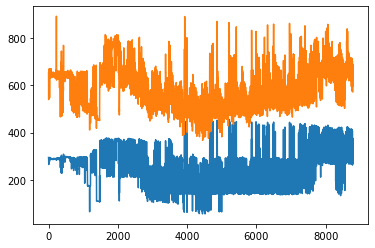

In [ ]:
shift, scale = params[np.argmin(scores)]
print(shift, scale)
y_input = pd.Series(y_flow.loc[common_index].values.ravel() + scale*y_height_mean.shift(shift).loc[common_index].values.ravel(),index = common_index)
plt.plot(y_flow.values)
plt.plot(y_input.values)

In [21]:
y_input.to_pickle('drainage_ING_target')

In [22]:
y_input

0       652.055836
1       649.478959
2       627.427817
3       602.915794
4       539.688301
           ...    
8779    673.885391
8780    637.968696
8781    653.798249
8782    572.783877
8783           NaN
Length: 8784, dtype: float64

In [ ]:
# plt.plot(y_height_mean)
# plt.plot(y_height_max)
# plt.plot(y_height_min)